Hi i am Shahzaib Hamza,
in this project We will focus on:

1. Visualizing the trend of confirmed, recovered, and death cases globally.
2. Comparing the spread in the top 10 affected countries.
3. Analyzing recovery and mortality rates.
4. Visualizing data for specific time periods or countries.




In [ ]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now, we will load the data set which i have picked from Kaggle named Covid 19 Dataset

In [ ]:
data = pd.read_csv('covid_19_clean_complete.csv')

In [ ]:
#printing first five rows of data to understand dataser
print(data.head())

  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


In [ ]:
#checking for missing values
data.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


**Exploratory Data Analysis**

In [ ]:
#understanding Data Structure
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


**Visualization of trend over time**

<Axes: xlabel='Date', ylabel='Confirmed'>

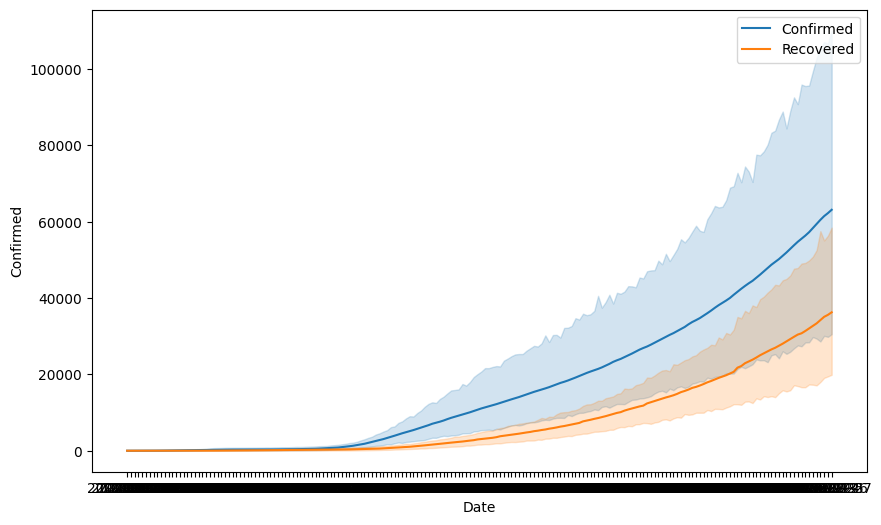

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Date', y='Confirmed', label='Confirmed')
sns.lineplot(data=data, x='Date', y='Recovered', label='Recovered')

Top 10 Countries **Analysis**

<ipython-input-10-d0c78e51bc61>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='Country/Region', data=top_10_countries, palette='viridis')


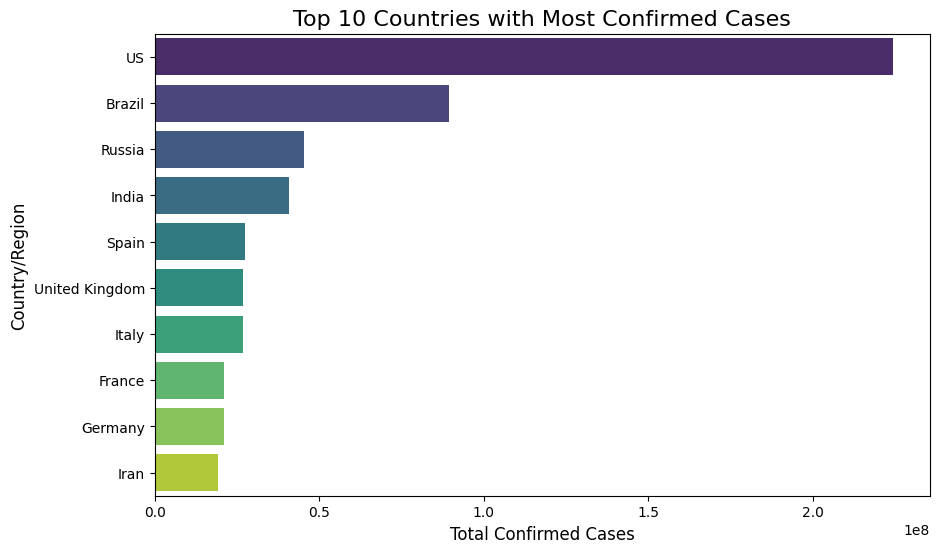

In [ ]:
country_data = data.groupby('Country/Region')['Confirmed'].sum().reset_index()
top_10_countries = country_data.sort_values(by='Confirmed', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Confirmed', y='Country/Region', data=top_10_countries, palette='viridis')
plt.title('Top 10 Countries with Most Confirmed Cases', fontsize=16)
plt.xlabel('Total Confirmed Cases', fontsize=12)
plt.ylabel('Country/Region', fontsize=12)
plt.show()

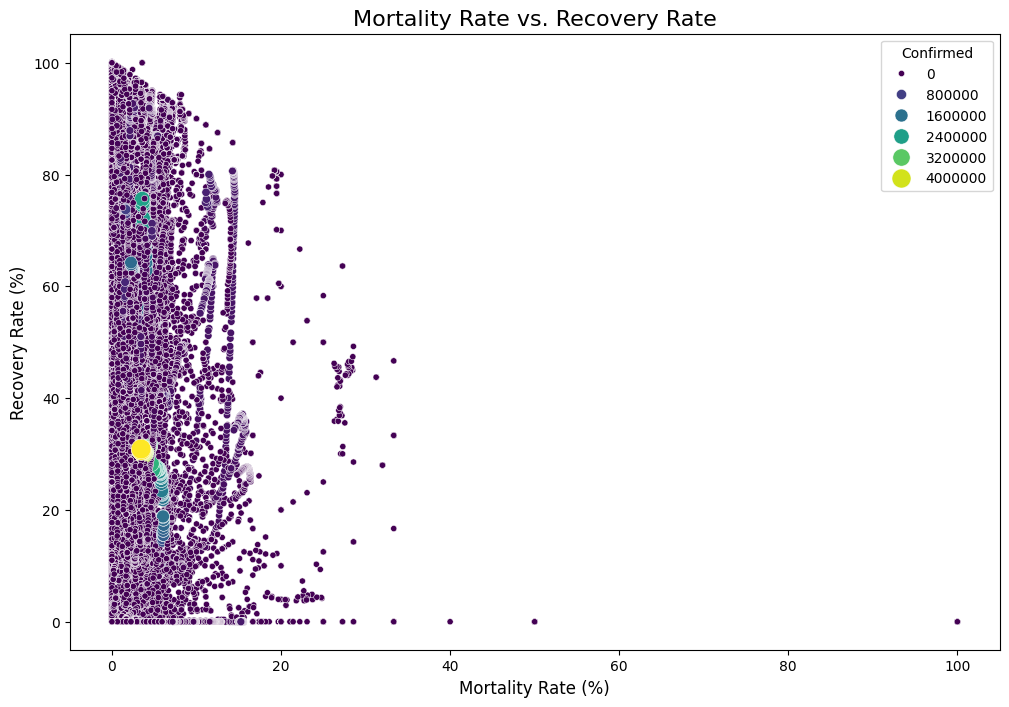

In [ ]:
# Calculate mortality and recovery rates (example calculations, adjust as needed)
data['Mortality_Rate'] = (data['Deaths'] / data['Confirmed']) * 100
data['Recovery_Rate'] = (data['Recovered'] / data['Confirmed']) * 100


plt.figure(figsize=(12, 8))
sns.scatterplot(x='Mortality_Rate', y='Recovery_Rate', hue='Confirmed', data=data, palette='viridis', size='Confirmed', sizes=(20, 200))
plt.title('Mortality Rate vs. Recovery Rate', fontsize=16)
plt.xlabel('Mortality Rate (%)', fontsize=12)
plt.ylabel('Recovery Rate (%)', fontsize=12)
plt.show()